In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
var_corr = app_train.corr()['TARGET']
var_corr

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.030896
FLAG_OWN_CAR                               -0.021851
FLAG_OWN_REALTY                            -0.006148
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039645
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                 -0.078239
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.037612
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [4]:
var_corr.nlargest(2)

TARGET           1.000000
DAYS_EMPLOYED    0.074958
Name: TARGET, dtype: float64

In [5]:
var_corr.drop('TARGET', inplace = True)

In [6]:
var_corr.nlargest(2)

DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
Name: TARGET, dtype: float64

In [7]:
print('====== Correlation largest(5) ======')
print(var_corr.abs().nlargest(5))
print('')
print('====== Correlation smallest(5) ======')
print(var_corr.abs().nsmallest(5))

====== Correlation largest(5) ======
EXT_SOURCE_3     0.178919
EXT_SOURCE_2     0.160472
EXT_SOURCE_1     0.155317
DAYS_BIRTH       0.078239
DAYS_EMPLOYED    0.074958
Name: TARGET, dtype: float64

====== Correlation smallest(5) ======
ORGANIZATION_TYPE_Industry: type 7    0.000094
ORGANIZATION_TYPE_Advertising         0.000117
FLAG_DOCUMENT_20                      0.000215
ORGANIZATION_TYPE_Legal Services      0.000236
NAME_HOUSING_TYPE_Co-op apartment     0.000312
Name: TARGET, dtype: float64


In [8]:
var_corr.abs().nlargest(5)[1]

0.1604716716054463

In [9]:
var_corr.abs().nlargest(5).index[1]

'EXT_SOURCE_2'

### 相關係數最高者前15個

In [10]:
# 15 largest correlation
corr_largest15 = [ var_corr.abs().nlargest(15).index[i] for i in range(0,15)]
corr_largest15

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Higher education',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER_M',
 'CODE_GENDER_F',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'NAME_EDUCATION_TYPE_Secondary / secondary special']

In [11]:
for col in corr_largest15:
    len_values = len(app_train[col].value_counts())
    print("colname - [{}] / valus counts {}".format(col, len_values))

colname - [EXT_SOURCE_3] / valus counts 814
colname - [EXT_SOURCE_2] / valus counts 119831
colname - [EXT_SOURCE_1] / valus counts 114584
colname - [DAYS_BIRTH] / valus counts 17460
colname - [DAYS_EMPLOYED] / valus counts 12573
colname - [REGION_RATING_CLIENT_W_CITY] / valus counts 3
colname - [REGION_RATING_CLIENT] / valus counts 3
colname - [NAME_INCOME_TYPE_Working] / valus counts 2
colname - [NAME_EDUCATION_TYPE_Higher education] / valus counts 2
colname - [DAYS_LAST_PHONE_CHANGE] / valus counts 3773
colname - [CODE_GENDER_M] / valus counts 2
colname - [CODE_GENDER_F] / valus counts 2
colname - [DAYS_ID_PUBLISH] / valus counts 6168
colname - [REG_CITY_NOT_WORK_CITY] / valus counts 2
colname - [NAME_EDUCATION_TYPE_Secondary / secondary special] / valus counts 2


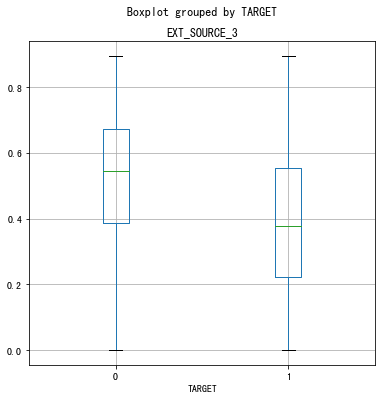

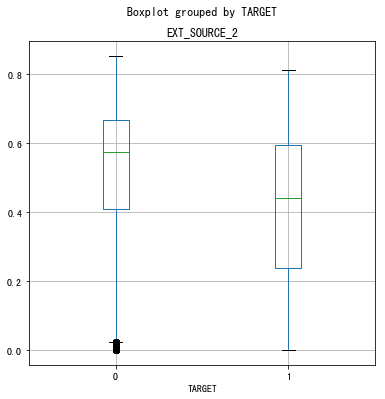

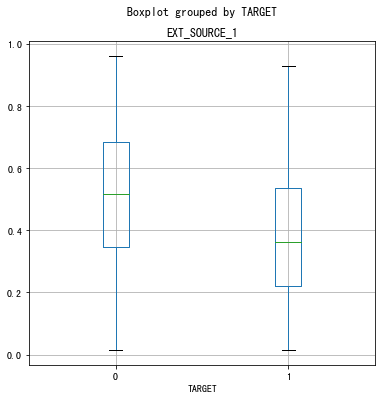

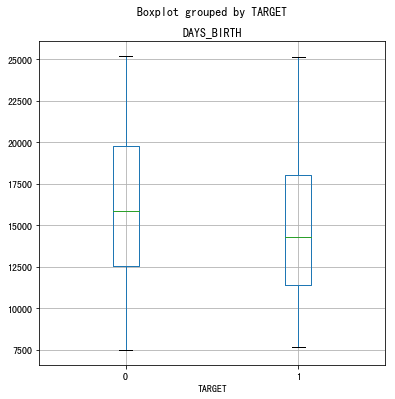

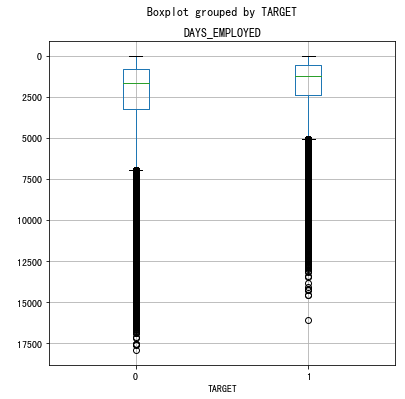

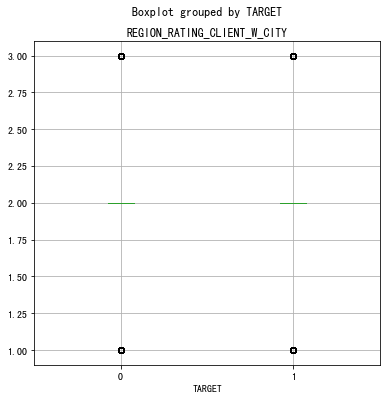

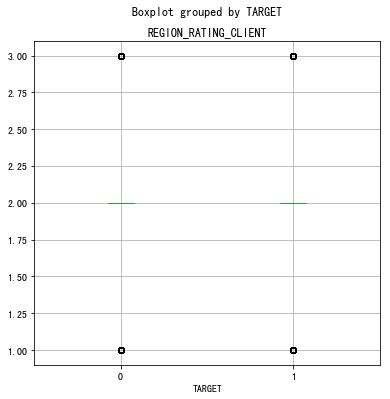

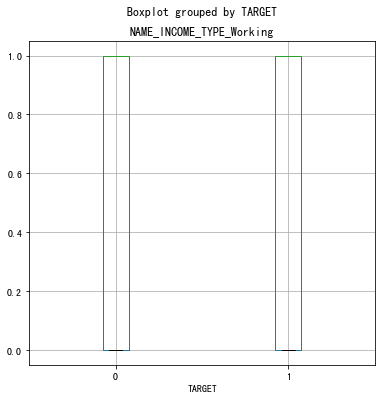

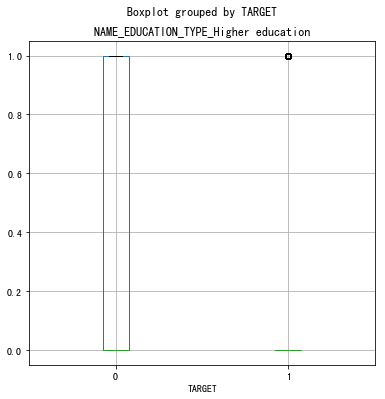

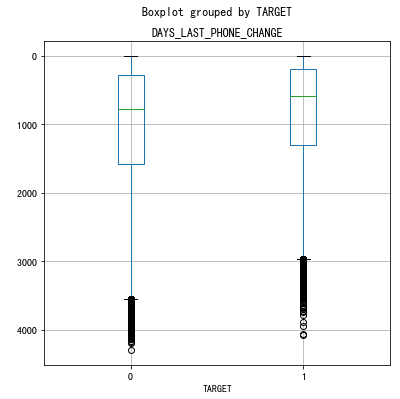

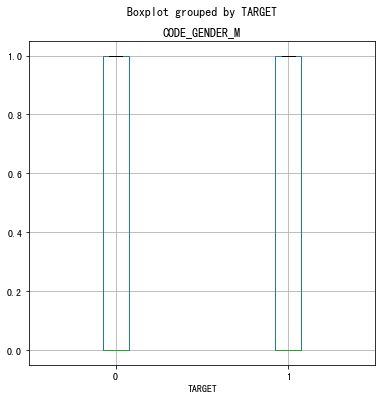

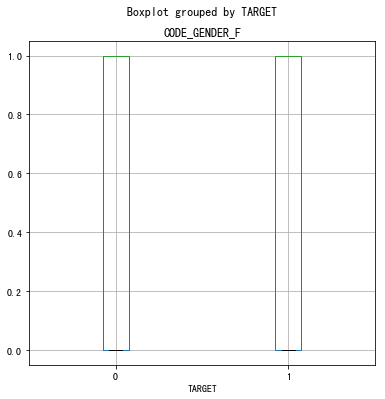

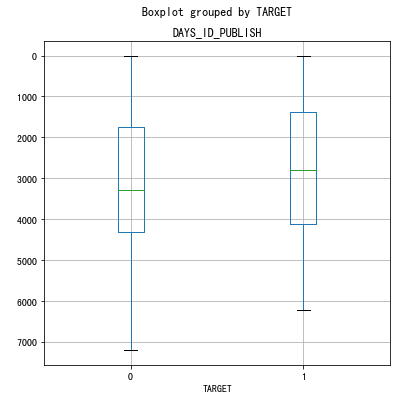

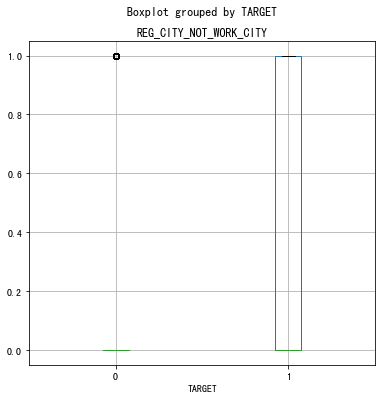

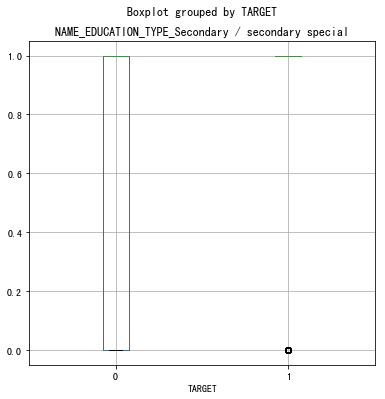

In [12]:
# Boxplot
for col in corr_largest15:
    app_train.boxplot(column = [col], by = 'TARGET', showfliers = True, figsize=(6,6))

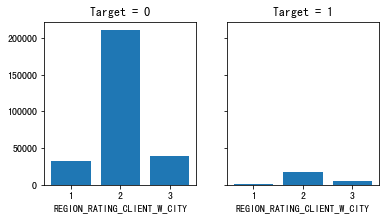

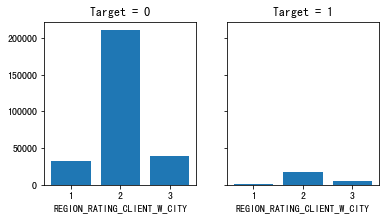

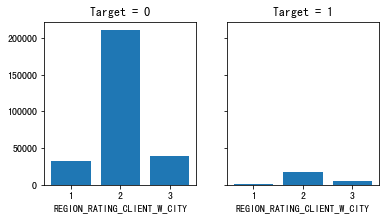

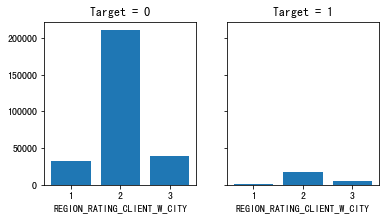

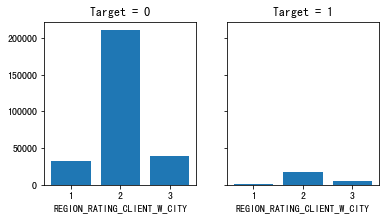

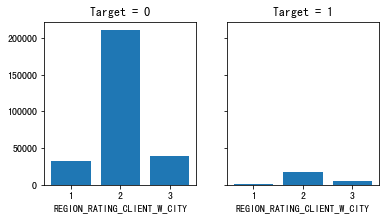

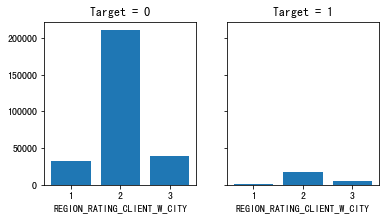

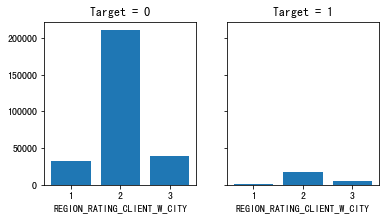

In [13]:
# value_counts <5 者看個別類別分佈 By Target
t1 = app_train[app_train['TARGET'] == 1]
t0 = app_train[app_train['TARGET'] == 0]


for col in corr_largest15:
    len_values = len(app_train[col].value_counts())
 
    if len_values < 5:
        t1_1 = t1['REGION_RATING_CLIENT_W_CITY'].value_counts()
        t0_1 = t0['REGION_RATING_CLIENT_W_CITY'].value_counts()

        fig, axs = plt.subplots(1, 2, figsize = (6, 3), sharey = True)
            
        axs[0].bar(t0_1.index.tolist(), t0_1.values.tolist())
        axs[0].set_title('Target = 0')
        axs[0].set_xlabel('REGION_RATING_CLIENT_W_CITY')

        axs[1].bar(t1_1.index.tolist(), t1_1.values.tolist())
        axs[1].set_title('Target = 1')
        axs[1].set_xlabel('REGION_RATING_CLIENT_W_CITY')


### 相關係數最低者前15個

In [14]:
# 15 smallest correlation
corr_smallest15 = [ var_corr.abs().nsmallest(15).index[i] for i in range(0,15)]
corr_smallest15

['ORGANIZATION_TYPE_Industry: type 7',
 'ORGANIZATION_TYPE_Advertising',
 'FLAG_DOCUMENT_20',
 'ORGANIZATION_TYPE_Legal Services',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'FLAG_DOCUMENT_5',
 'ORGANIZATION_TYPE_Business Entity Type 1',
 'FLAG_CONT_MOBILE',
 'OCCUPATION_TYPE_Realty agents',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'NAME_TYPE_SUITE_Group of people',
 'ORGANIZATION_TYPE_Housing',
 'FLAG_MOBIL',
 'WALLSMATERIAL_MODE_Others',
 'ORGANIZATION_TYPE_Industry: type 6']

In [15]:
for col in corr_smallest15:
    len_values = len(app_train[col].value_counts())
    print("colname - [{}] / valus counts {}".format(col, len_values))

colname - [ORGANIZATION_TYPE_Industry: type 7] / valus counts 2
colname - [ORGANIZATION_TYPE_Advertising] / valus counts 2
colname - [FLAG_DOCUMENT_20] / valus counts 2
colname - [ORGANIZATION_TYPE_Legal Services] / valus counts 2
colname - [NAME_HOUSING_TYPE_Co-op apartment] / valus counts 2
colname - [FLAG_DOCUMENT_5] / valus counts 2
colname - [ORGANIZATION_TYPE_Business Entity Type 1] / valus counts 2
colname - [FLAG_CONT_MOBILE] / valus counts 2
colname - [OCCUPATION_TYPE_Realty agents] / valus counts 2
colname - [WEEKDAY_APPR_PROCESS_START_THURSDAY] / valus counts 2
colname - [NAME_TYPE_SUITE_Group of people] / valus counts 2
colname - [ORGANIZATION_TYPE_Housing] / valus counts 2
colname - [FLAG_MOBIL] / valus counts 2
colname - [WALLSMATERIAL_MODE_Others] / valus counts 2
colname - [ORGANIZATION_TYPE_Industry: type 6] / valus counts 2


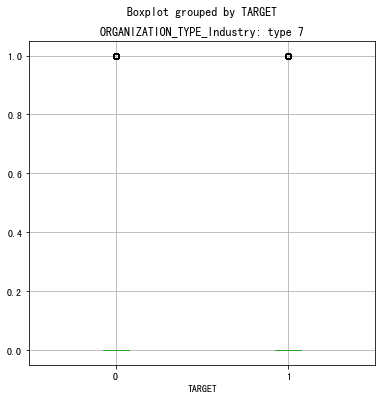

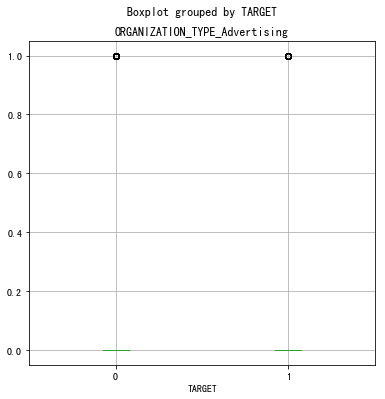

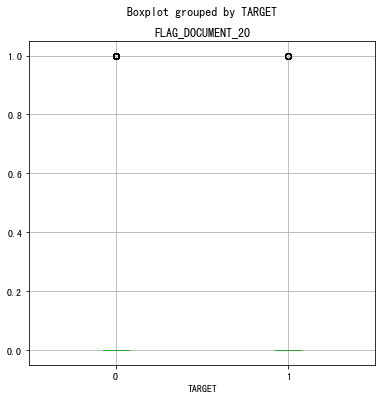

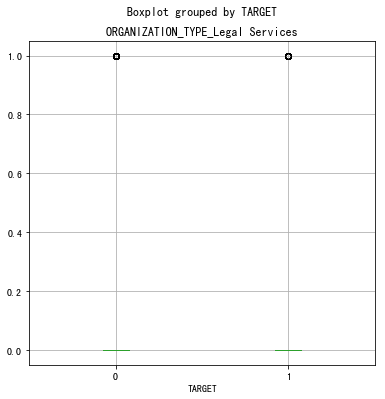

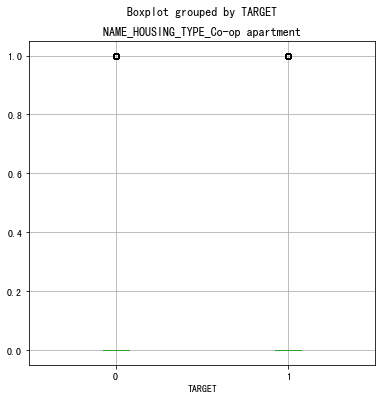

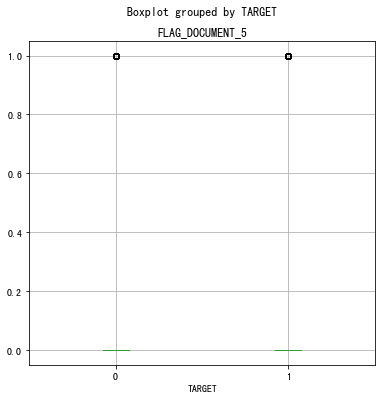

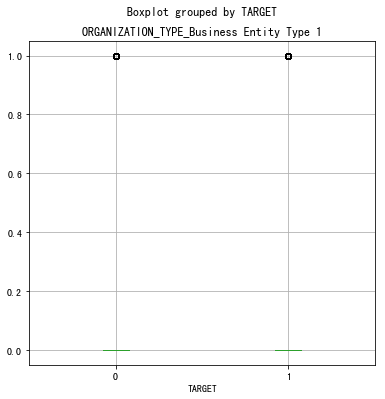

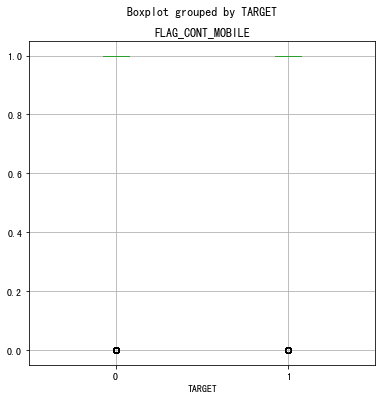

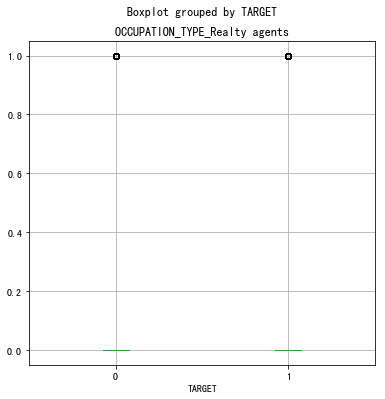

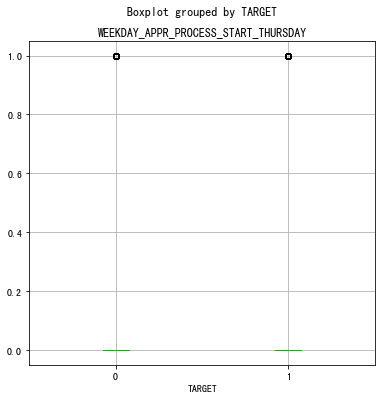

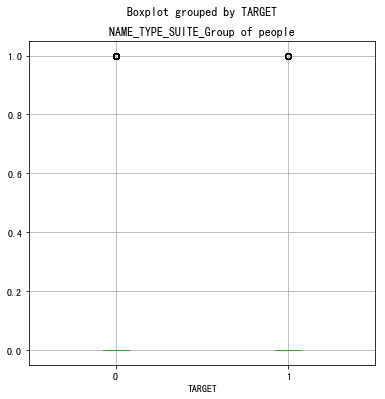

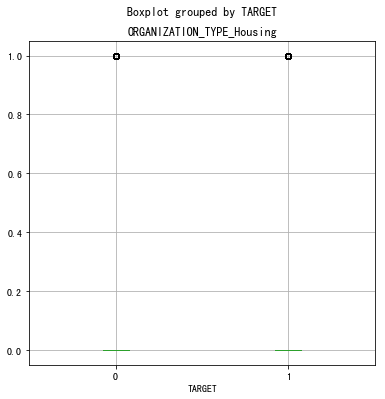

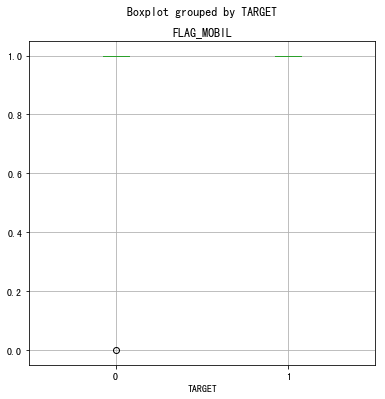

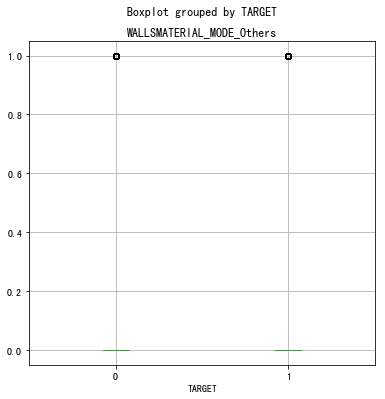

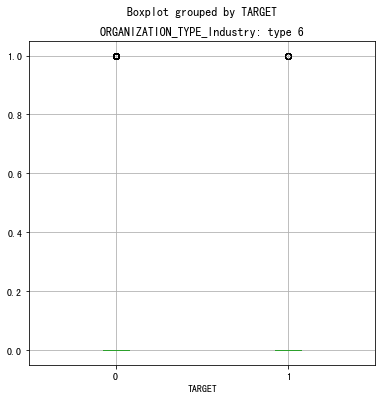

In [16]:
# Boxplot
for col in corr_smallest15:
    app_train.boxplot(column = [col], by = 'TARGET', showfliers = True, figsize=(6,6))

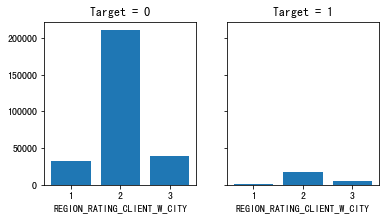

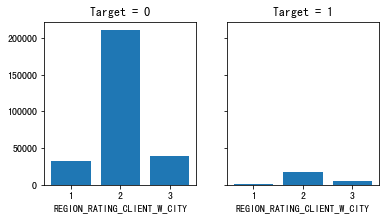

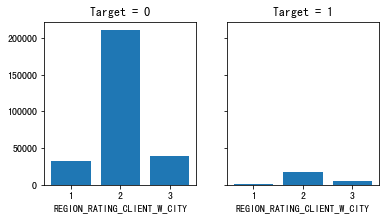

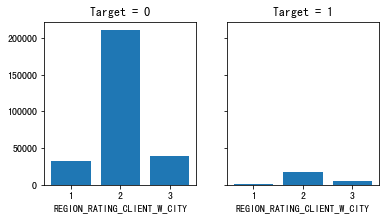

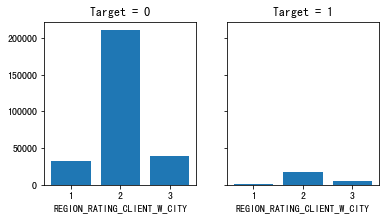

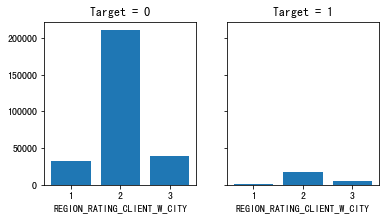

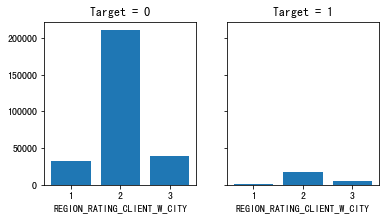

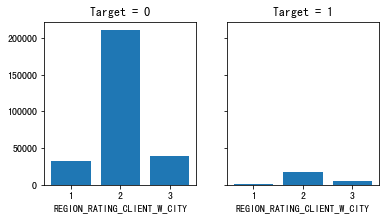

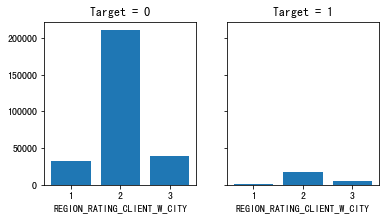

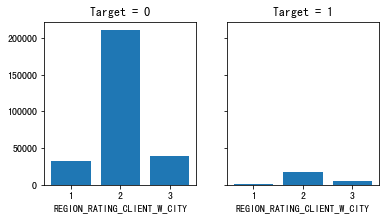

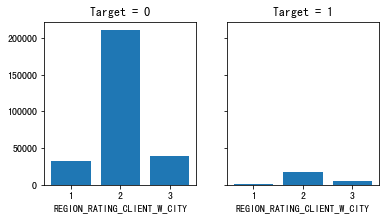

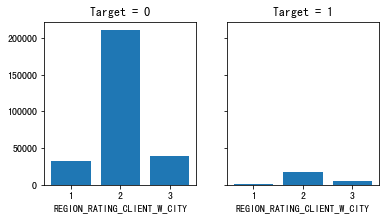

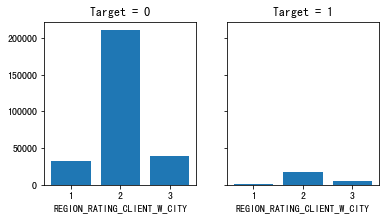

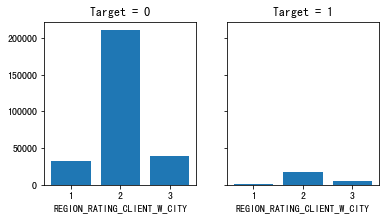

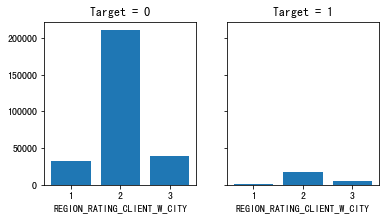

In [17]:
# value_counts <5 者看個別類別分佈 By Target
t1 = app_train[app_train['TARGET'] == 1]
t0 = app_train[app_train['TARGET'] == 0]


for col in corr_smallest15:
    len_values = len(app_train[col].value_counts())
 
    if len_values < 5:
        t1_1 = t1['REGION_RATING_CLIENT_W_CITY'].value_counts()
        t0_1 = t0['REGION_RATING_CLIENT_W_CITY'].value_counts()

        fig, axs = plt.subplots(1, 2, figsize = (6, 3), sharey = True)
            
        axs[0].bar(t0_1.index.tolist(), t0_1.values.tolist())
        axs[0].set_title('Target = 0')
        axs[0].set_xlabel('REGION_RATING_CLIENT_W_CITY')

        axs[1].bar(t1_1.index.tolist(), t1_1.values.tolist())
        axs[1].set_title('Target = 1')
        axs[1].set_xlabel('REGION_RATING_CLIENT_W_CITY')